### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
glob_ter = pd.read_csv("globalterrorismdb_0718dist.csv")
glob_ter.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Data Understanding

In [3]:
glob_ter.shape

(181691, 135)

In [4]:
glob_ter.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [5]:
glob_ter.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Data Preparation

In [6]:
for col in glob_ter.columns:
    print(col,end =", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

#### Required Columns

##### iyear (Numeric Variable) : This field contains the year in which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the year when the incident was initiated.

##### imonth (Numeric Variable) : This field contains the number of the month in which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the month when the incident was initiated. 

##### iday (Numeric Variable) : This field contains the numeric day of the month on which the incident occurred. In the case of incident(s) occurring over an extended period, the field will record the day when the incident was initiated.

In [7]:
#Required Columns
req_col = ["eventid", "iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "attacktype1_txt", "targtype1_txt",'weaptype1_txt',
 "weapsubtype1_txt", "nkill", "nkillter", "nwound", "nwoundte"]

In [8]:
glob_ter_final = pd.read_csv("globalterrorismdb_0718dist.csv",usecols=req_col)

In [9]:
glob_ter_final.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,weapsubtype1_txt,nkill,nkillter,nwound,nwoundte
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,NaN,1.0,NaN,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,NaN,0.0,NaN,0.0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,NaN,1.0,NaN,0.0,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN,NaN,NaN


In [10]:
glob_ter_final.shape

(181691, 18)

In [11]:
glob_ter_final.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
country_txt          object
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
attacktype1_txt      object
targtype1_txt        object
weaptype1_txt        object
weapsubtype1_txt     object
nkill               float64
nkillter            float64
nwound              float64
nwoundte            float64
dtype: object

In [12]:
glob_ter_final.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
targtype1_txt           0
weaptype1_txt           0
weapsubtype1_txt    20768
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
dtype: int64

#### FILL NULL Values

In [13]:
glob_ter_final[["provstate", "city",]] = glob_ter_final[["provstate", "city",]].fillna(value="unknown",axis=1)

In [14]:
glob_ter_final[["latitude", "longitude"]] = glob_ter_final[["latitude", "longitude"]].fillna(value=0,axis=1)

In [15]:
glob_ter_final["weapsubtype1_txt"] = glob_ter_final["weapsubtype1_txt"].fillna(value="unknown",axis=0)

In [16]:
glob_ter_final[["nkill", "nkillter", "nwound", "nwoundte"]] = glob_ter_final[["nkill", "nkillter", "nwound", "nwoundte"]].fillna(value=0,axis=1)

In [17]:
glob_ter_final.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
attacktype1_txt     0
targtype1_txt       0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nkillter            0
nwound              0
nwoundte            0
dtype: int64

### Data Visualization

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: iyear, dtype: int64


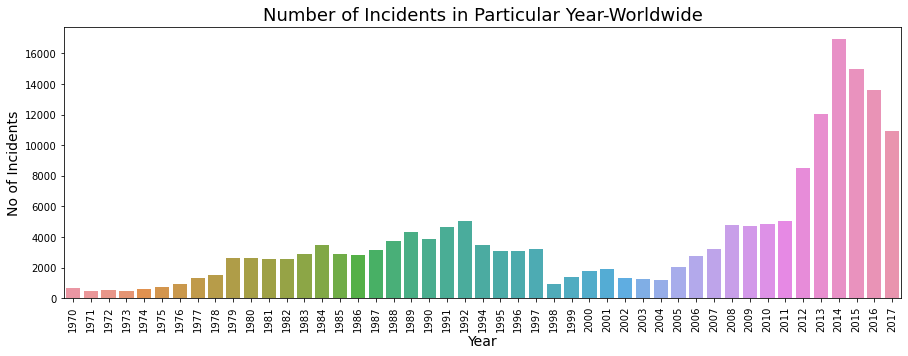

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x=glob_ter_final["iyear"])
plt.title("Number of Incidents in Particular Year-Worldwide",fontsize=18)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final["iyear"].value_counts().sort_values(ascending=False).head(5))
plt.show()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


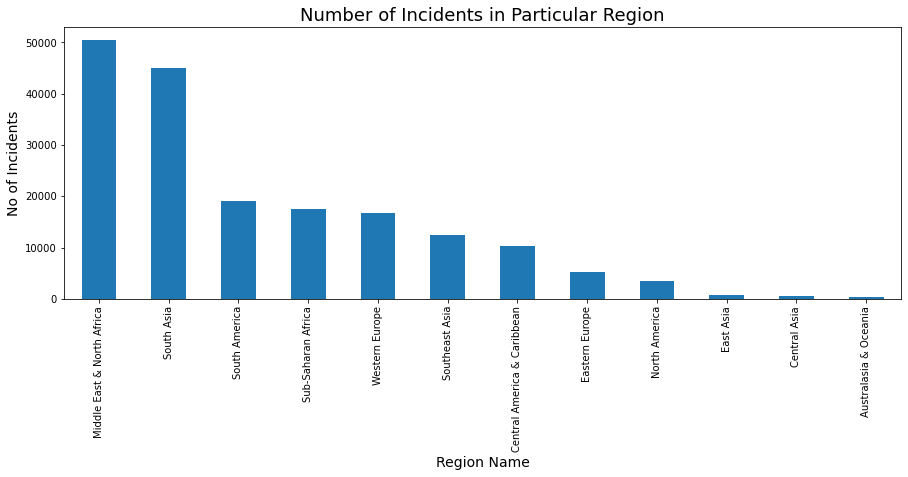

In [19]:
plt.figure(figsize=(15,5))
glob_ter_final["region_txt"].value_counts().sort_values(ascending=False).plot.bar()
plt.title("Number of Incidents in Particular Region",fontsize=18)
plt.xlabel("Region Name",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final["region_txt"].value_counts().sort_values(ascending=False))
plt.show()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: country_txt, dtype: int64


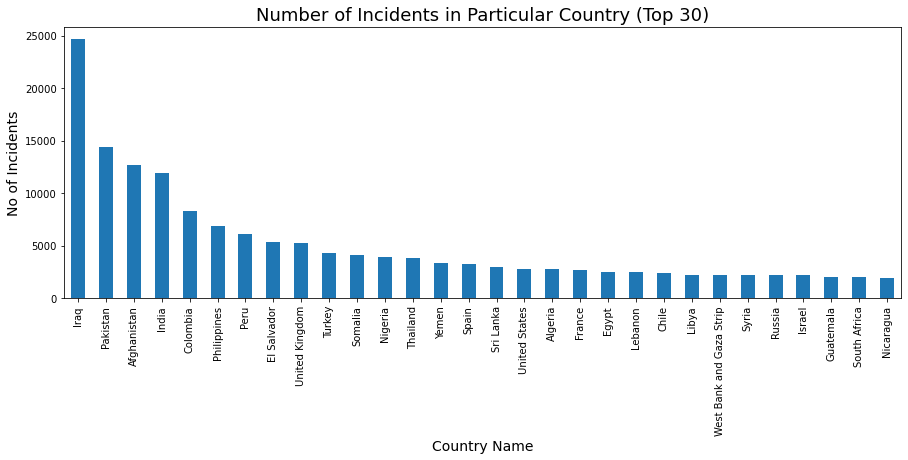

In [20]:
plt.figure(figsize=(15,5))
glob_ter_final["country_txt"].value_counts().sort_values(ascending=False).head(30).plot.bar()
plt.title("Number of Incidents in Particular Country (Top 30)",fontsize=18)
plt.xlabel("Country Name",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final["country_txt"].value_counts().sort_values(ascending=False).head(5))
plt.show()

2016    1025
2017     966
2015     884
2014     860
2013     694
Name: iyear, dtype: int64


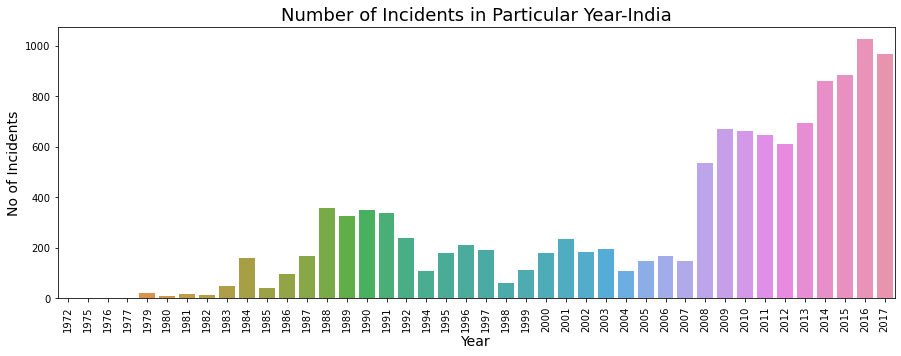

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["iyear"])
plt.title("Number of Incidents in Particular Year-India",fontsize=18)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final[glob_ter_final["country_txt"]=="India"]["iyear"].value_counts().sort_values(ascending=False).head(5))
plt.show()

4    1201
5    1181
8    1160
7    1074
6    1021
Name: imonth, dtype: int64


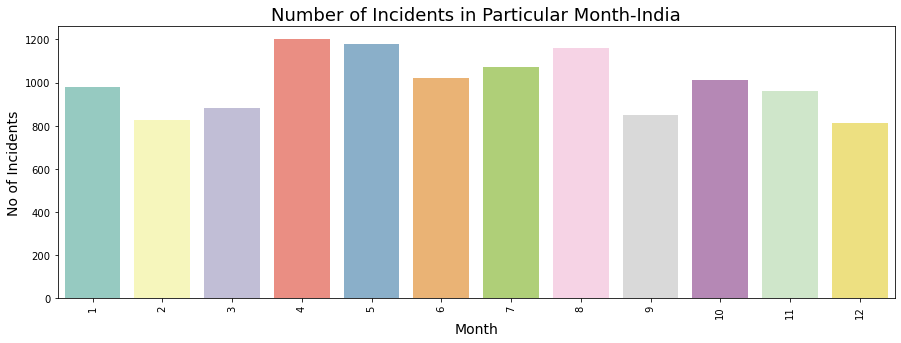

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["imonth"],palette="Set3")
plt.title("Number of Incidents in Particular Month-India",fontsize=18)
plt.xlabel("Month",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final[glob_ter_final["country_txt"]=="India"]["imonth"].value_counts().sort_values(ascending=False).head(5))
plt.show()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Name: provstate, dtype: int64


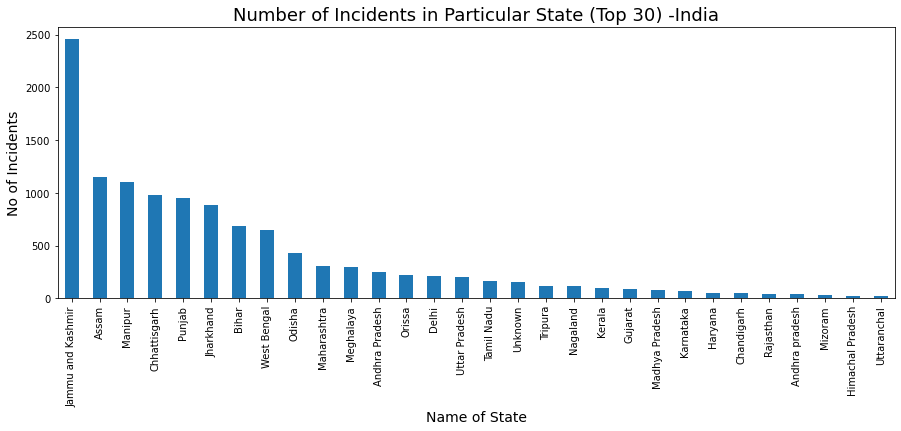

In [32]:
plt.figure(figsize=(15,5))
glob_ter_final[glob_ter_final["country_txt"]=="India"]["provstate"].value_counts().sort_values(ascending=False).head(30).plot.bar()
plt.title("Number of Incidents in Particular State (Top 30) -India",fontsize=18)
plt.xlabel("Name of State",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final[glob_ter_final["country_txt"]=="India"]["provstate"].value_counts().sort_values(ascending=False).head(5))
plt.show()

Srinagar     658
Unknown      624
Imphal       426
New Delhi    157
Amritsar     138
Name: city, dtype: int64


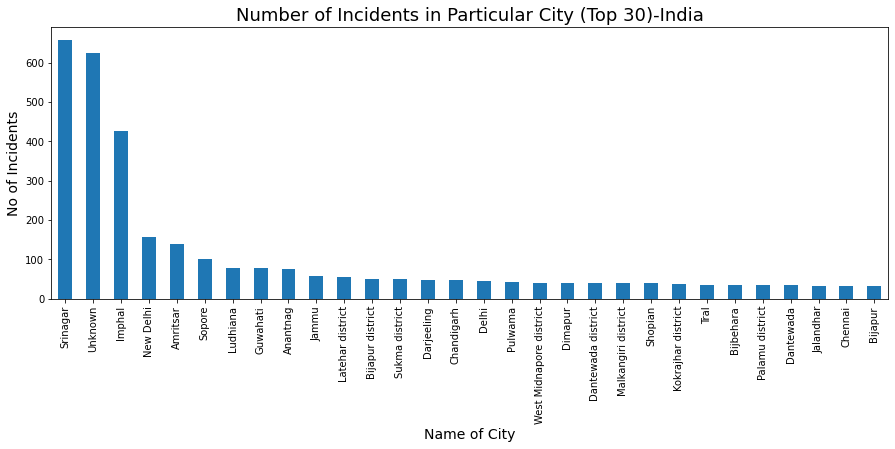

In [30]:
plt.figure(figsize=(15,5))
glob_ter_final[glob_ter_final["country_txt"]=="India"]["city"].value_counts().sort_values(ascending=False).head(30).plot.bar()
plt.title("Number of Incidents in Particular City (Top 30)-India",fontsize=18)
plt.xlabel("Name of City",fontsize=14)
plt.ylabel("No of Incidents",fontsize=14)
plt.xticks(rotation=90)
print(glob_ter_final[glob_ter_final["country_txt"]=="India"]["city"].value_counts().sort_values(ascending=False).head(5))
plt.show()

In [25]:
glob_ter_final.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,weapsubtype1_txt,nkill,nkillter,nwound,nwoundte
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,unknown,1.0,0.0,0.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,unknown,0.0,0.0,0.0,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,unknown,1.0,0.0,0.0,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown Explosive Type,0.0,0.0,0.0,0.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,unknown,0.0,0.0,0.0,0.0


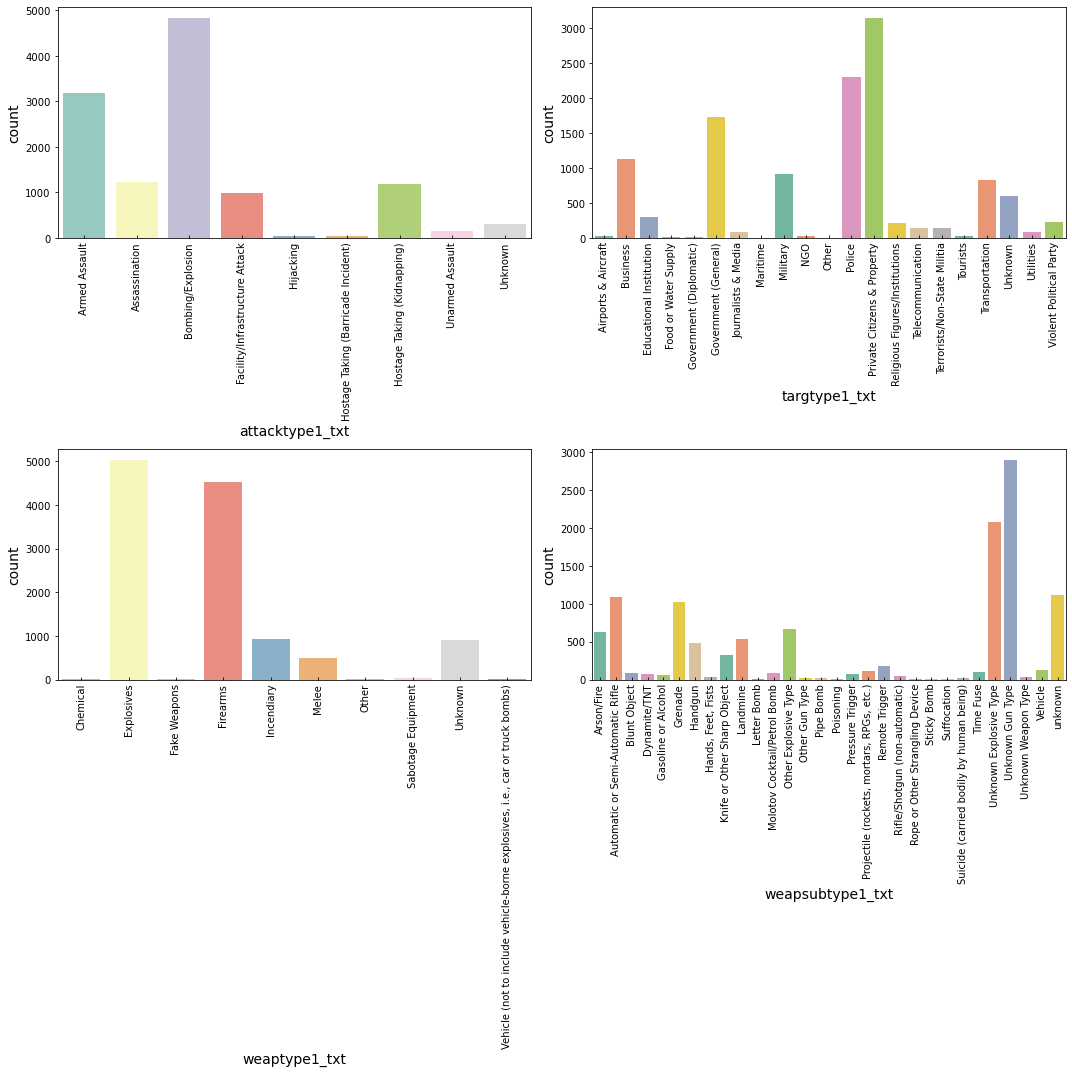

In [69]:
fig, ax=plt.subplots(2,2,figsize=(15,15))
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["attacktype1_txt"].sort_values(),palette="Set3",ax=ax[0,0])
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["targtype1_txt"].sort_values(),palette="Set2",ax=ax[0,1])
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["weaptype1_txt"].sort_values(),palette="Set3",ax=ax[1,0])
sns.countplot(x=glob_ter_final[glob_ter_final["country_txt"]=="India"]["weapsubtype1_txt"].sort_values(),palette="Set2",ax=ax[1,1])
for ax in fig.axes:
    ax.tick_params(axis='x',labelrotation=90,direction="in",which="major")
    ax.xaxis.get_label().set_fontsize(14)
    ax.yaxis.get_label().set_fontsize(14)
fig.tight_layout()  
plt.show()

    iyear    nkill  nkillter
43   2014  44490.0   10341.0
44   2015  38853.0   11623.0
45   2016  34871.0   11672.0
46   2017  26445.0    8075.0
42   2013  22273.0    3545.0


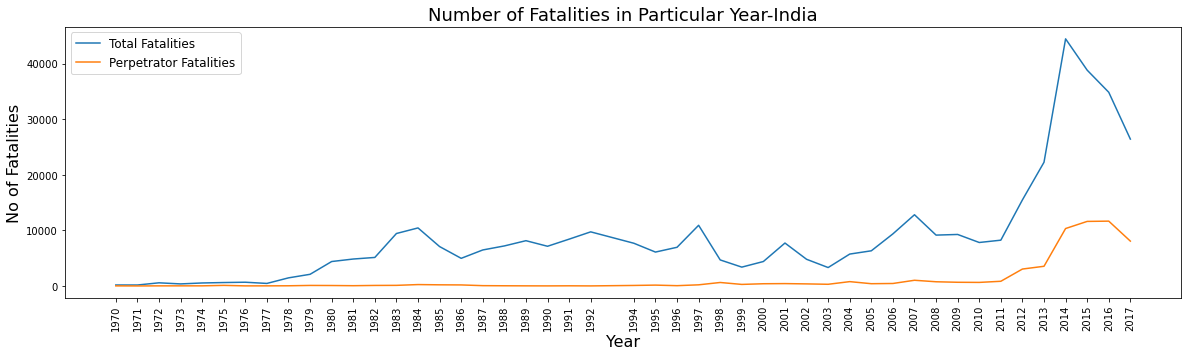

In [57]:
df = glob_ter_final.groupby(["iyear"],as_index=True)["nkill","nkillter"].sum()
df.plot.line(figsize=(20,5)).legend(["Total Fatalities","Perpetrator Fatalities"],fontsize=12)
plt.title("Number of Fatalities in Particular Year-India",fontsize=18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("No of Fatalities",fontsize=16)
plt.xticks(glob_ter_final["iyear"].unique(),rotation=90)
print(glob_ter_final.groupby(["iyear"],as_index=False)["nkill","nkillter"].sum().sort_values(by="nkill",ascending=False).head(5))
plt.show()


    iyear   nwound  nwoundte
44   2015  44043.0    2946.0
43   2014  41128.0    1848.0
45   2016  40001.0    2677.0
42   2013  37688.0     557.0
41   2012  25445.0     444.0


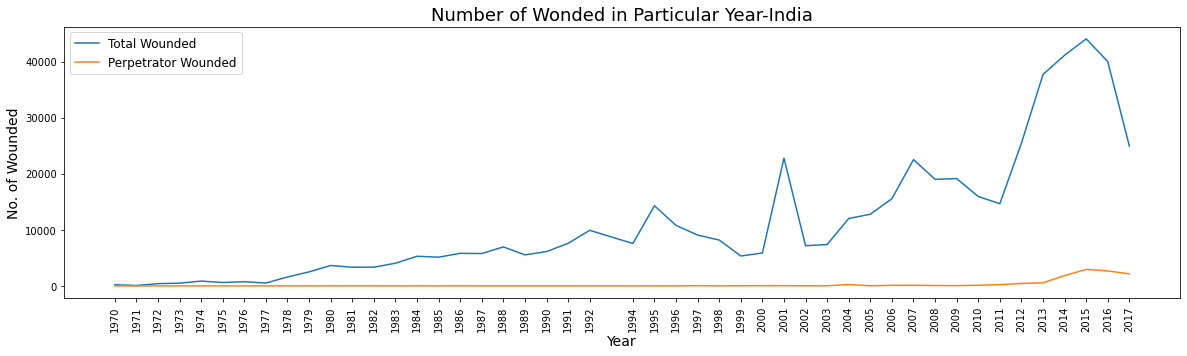

In [56]:
df = glob_ter_final.groupby(["iyear"],as_index=True)["nwound","nwoundte"].sum()
df.plot.line(figsize=(20,5)).legend(["Total Wounded","Perpetrator Wounded"],fontsize=12)
plt.title("Number of Wonded in Particular Year-India",fontsize=18)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No. of Wounded",fontsize=14)
plt.xticks(glob_ter_final["iyear"].unique(),rotation=90)
print(glob_ter_final.groupby(["iyear"],as_index=False)["nwound","nwoundte"].sum().sort_values(by="nwound",ascending=False).head(5))
plt.show()


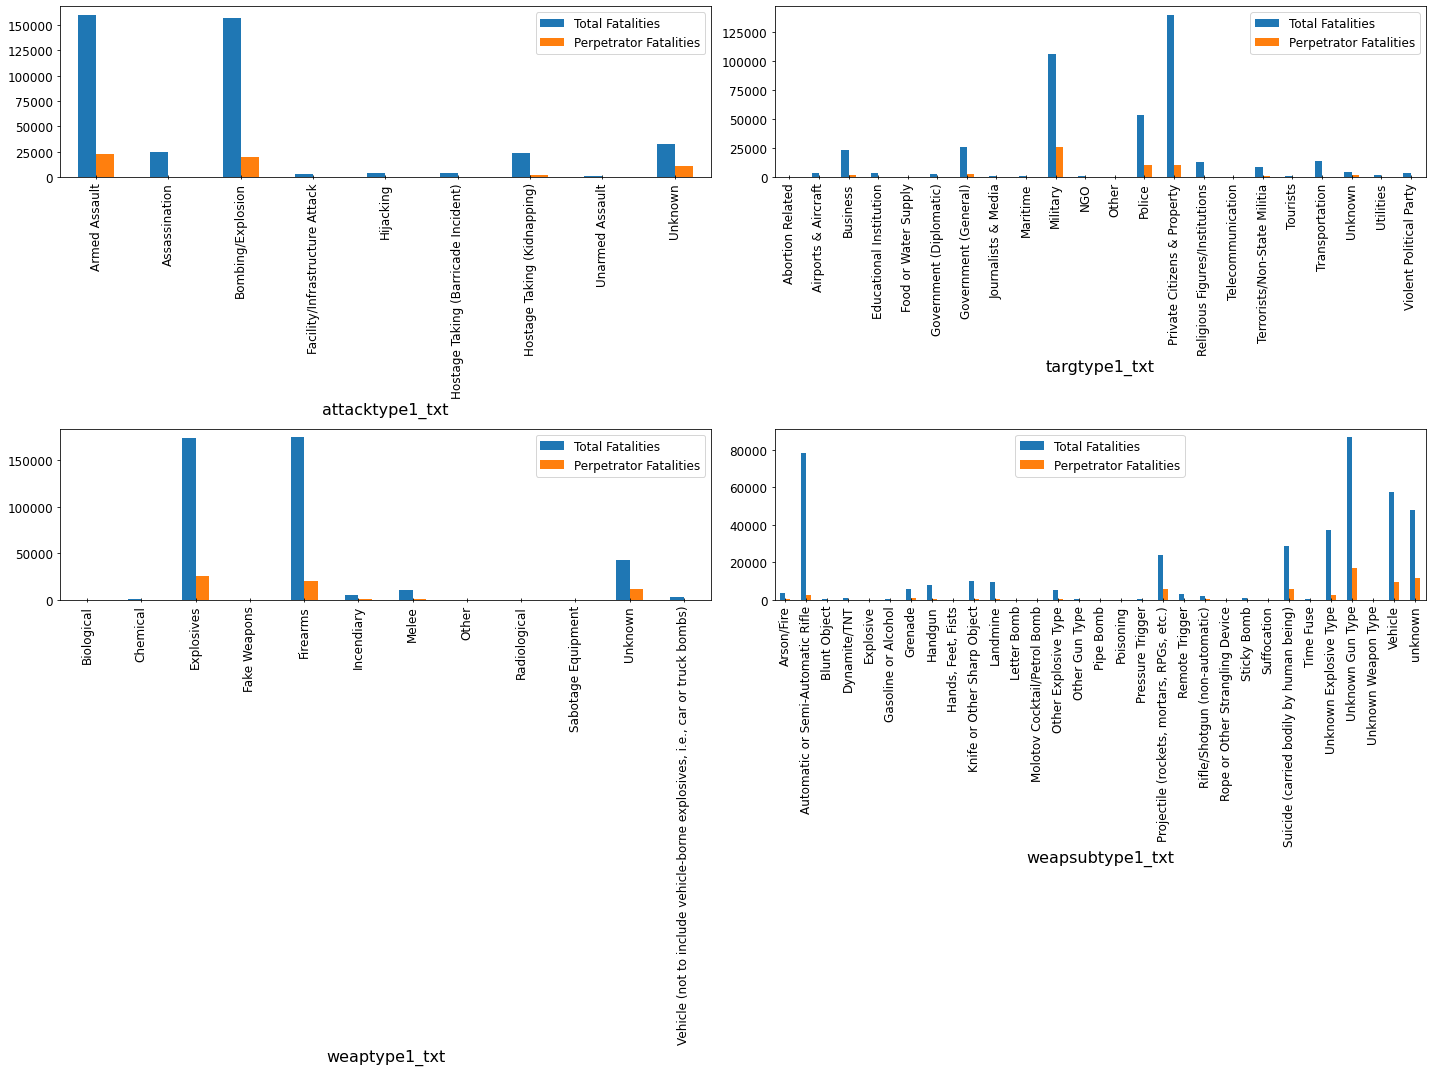

In [153]:
fig, ax=plt.subplots(2,2)
glob_ter_final.groupby(["attacktype1_txt"],as_index=True)["nkill","nkillter"].sum().plot.bar(figsize=(20,15),ax=ax[0,0]).legend(["Total Fatalities","Perpetrator Fatalities"],fontsize=12)
glob_ter_final.groupby(["targtype1_txt"],as_index=True)["nkill","nkillter"].sum().plot.bar(figsize=(20,15),ax=ax[0,1]).legend(["Total Fatalities","Perpetrator Fatalities"],fontsize=12)
glob_ter_final.groupby(["weaptype1_txt"],as_index=True)["nkill","nkillter"].sum().plot.bar(figsize=(20,15),ax=ax[1,0]).legend(["Total Fatalities","Perpetrator Fatalities"],fontsize=12)
glob_ter_final.groupby(["weapsubtype1_txt"],as_index=True)["nkill","nkillter"].sum().plot.bar(figsize=(20,15),ax=ax[1,1]).legend(["Total Fatalities","Perpetrator Fatalities"],fontsize=12)
for ax in fig.axes:
    ax.tick_params(axis='x',labelrotation=90,which="major",labelsize=12, direction="inout")
    ax.tick_params(axis='y',labelsize=12)
    ax.xaxis.get_label().set_fontsize(16)
    ax.yaxis.get_label().set_fontsize(16)
fig.tight_layout()  
plt.show()